In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [8]:
summary_capacity = pd.read_csv("../../raw_data/transformed_data/summary_charge_capacity.csv", usecols=range(0,3))
summary_capacity.head(145)

,barcode,0,1
0,el150800460610,1.441996,1.068214
1,el150800737368,1.043969,1.044813
2,el150800737386,1.064999,1.067030
3,EL150800463198,1.160316,1.076760
4,EL150800460514,1.161226,1.069269
...,...,...,...
130,el150800463208,1.452700,1.076223
131,el150800460655,1.445301,1.069201
132,el150800460652,1.454137,1.078564
133,el150800737213,1.047174,1.048364


In [ ]:
path = "../../raw_data/transformed_data/"
interpolated_voltage = pd.read_csv(path+"cycles_interpolated_voltage.csv")





In [114]:
path = "../../raw_data/transformed_data/"
#interpolated_discharge_capacity = pd.read_csv(path+"cycles_interpolated_discharge_capacity.csv")
#interpolated_charge_capacity = pd.read_csv(path+"cycles_interpolated_charge_capacity.csv")
#interpolated_voltage = pd.read_csv(path+"cycles_interpolated_voltage.csv")
#interpolated_current = pd.read_csv(path+"cycles_interpolated_current.csv")
#interpolated_temperature = pd.read_csv(path+"cycles_interpolated_temperature.csv")
#interpolated_internal_resistance = pd.read_csv(path+"cycles_interpolated_internal_resistance.csv")
# charge or discharge
#interpolated_step_type = pd.read_csv(path+"cycles_interpolated_step_type.csv")

"""chunksize = 1
for chunk in pd.read_csv(path+"cycles_interpolated_voltage.csv", chunksize=chunksize):
    print(chunk)
    break"""


""" callbacks functions for get_step_range() """
def dataframe_callback(df_chunk):
    return df_chunk
def mean_dataframe_callback(df_chunk):
    """ mean between columns """
    return df_chunk.mean(axis=1)[0]
def nan_count_dataframe_callback(df_chunk):
    """ count NaN values """
    return df_chunk.isnull().sum().sum()


def get_step_range(filename, range_a, range_b, row=0, callback=dataframe_callback):
    rows_to_keep = [row]
    #skiprows = [i for i in range(140) if i not in rows_to_keep]
    reader = pd.read_csv(filename, iterator=True, usecols=range(range_a,range_b), skiprows=row, chunksize=1)
    res = callback(reader.get_chunk(1))
    reader.close()
    return res

# total 2_000_000 rows
def interpolated_data_rows_to_df(filename, callback=mean_dataframe_callback):
    sample_size = 1 # sample size must be
    incr_step = 10_000
    cur_step = 1
    max_iterations = int(2_000_000 / incr_step)
    result = []
    
    # keep barcode string
    barcode = get_step_range(filename, 0,1, skiprows=0)['barcode'][0]
    
    if sample_size > incr_step:
        print("'sample_size' must be <= 'incr_step'")
        return
    
    i = 0
    while 1:
        try:
            result.append(get_step_range(filename, cur_step,cur_step+sample_size, callback=callback))
        except:
            print(f"Total rows readed before Exception: {cur_step}")
            break
        if i >= max_iterations:
            print(f"premature loop exit")
            break
        cur_step += incr_step
        i += 1
    return [barcode, result]


def interpolated_data_check(filename, skiprows=0, callback = nan_count_dataframe_callback):
    sample_size = 10_000 # sample size must be
    incr_step = sample_size
    cur_step = 1
    max_iterations = int(2_000_000 / sample_size)
    result = []
    
    # keep barcode string
    barcode = get_step_range(filename, 0,1, skiprows=0)['barcode'][0]
    
    if sample_size > incr_step:
        print("'sample_size' must be <= 'incr_step'")
        return
    
    i = 0
    while 1:
        try:
            result.append(get_step_range(filename, cur_step,cur_step+sample_size, skiprows=skiprows, callback=callback))
        except:
            print(f"Total rows readed before Exception: {cur_step}")
            break
        if i >= max_iterations:
            print(f"premature loop exit")
            break
        cur_step += incr_step
        i += 1
    return [barcode, result]

#temperature_nans_10000 = interpolated_data_nan_check(path+"cycles_interpolated_temperature.csv")
#print(temperature_nans_10000)

#voltage_nans_10000 = interpolated_data_nan_check(path+"cycles_interpolated_voltage.csv")
#print(voltage_nans_10000)

#step_type_nans_10000 = interpolated_data_nan_check(path+"cycles_interpolated_step_type.csv")
#print(step_type_nans_10000)

#res = interpolated_data_rows_to_df(path+"cycles_interpolated_step_type.csv", callback=dataframe_callback)
#display(res)



In [86]:
charge_discharge = []
for i in res[1]:
    charge_discharge.append(i.iloc[0,0])
charge_discharge

['discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'discharge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',
 'charge',

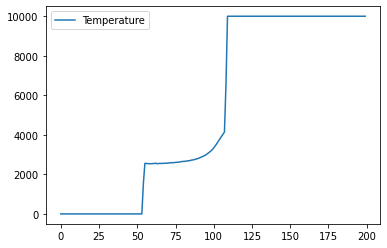

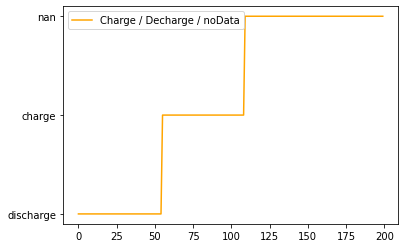

In [95]:
end = temperature_nans_10000[1].count(10000)

#plt.plot(temperature_nans_10000[1][0:-end]);
plt.plot(temperature_nans_10000[1], label='Temperature');
plt.legend(loc="upper left");
plt.show()

plt.plot(charge_discharge, label='Charge / Decharge / noData', color="orange");
plt.legend(loc="upper left");
plt.show()




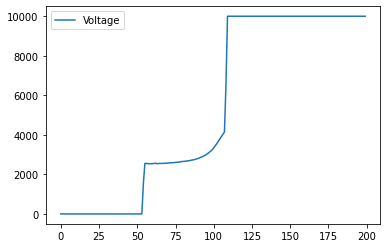

In [70]:
end = voltage_nans_10000[1].count(10000)

#plt.plot(temperature_nans_10000[1][0:-end]);
plt.plot(voltage_nans_10000[1], label='Voltage');
plt.legend(loc="upper left");

In [40]:
2_000_000 / 10000

200.0

In [116]:
get_step_range(path+"cycles_interpolated_discharge_capacity.csv", 0,5, row=1, callback=display)





KeyboardInterrupt: 

[0,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139]

In [ ]:
voltages = dfjson["cycles_interpolated"]['voltage']
plt.plot(voltages[0:-1])
plt.show()
plt.plot(voltages[0:1000])
plt.plot(voltages[1000:2000])
plt.plot(voltages[2000:3000]);
len(voltages)

In [ ]:
"""
à tester:
    discharge capacity
    charge capacity
    voltage
    temperature
    internal resistance
    current
"""
discharge_capacity = dfjson["cycles_interpolated"]['discharge_capacity']
charge_capacity = dfjson["cycles_interpolated"]['charge_capacity']
voltage = dfjson["cycles_interpolated"]['voltage']
current = dfjson["cycles_interpolated"]['current']
temperatures = dfjson["cycles_interpolated"]['temperature']
internal_resistance = dfjson["cycles_interpolated"]['internal_resistance']

step_type = dfjson["cycles_interpolated"]['step_type']




# lundi de 14h à 15h
# répétition générale le vendredi matin





plt.plot(discharge_capacity)
plt.plot(step_type)
plt.show()

plt.plot(charge_capacity)
plt.plot(step_type)
plt.show()

plt.plot(voltage)
plt.plot(step_type)
plt.show()

plt.plot(current)
plt.plot(step_type)
plt.show()

plt.plot(temperatures)
plt.plot(step_type)
plt.show()

plt.plot(internal_resistance)
plt.plot(step_type)
plt.show()




In [ ]:
len(voltages)

In [ ]:
dfjson['protocol']

In [ ]:
features_name = dfjson.iloc[:,0].index.tolist()
features_name

Loading fichiers json

In [ ]:
files_path = "raw_data/initial_data/Data/FastCharge"
files_type = ".json"
files_names = [
  "FastCharge_000000_CH19_structure",
  "FastCharge_000001_CH16_structure",
  "FastCharge_000001_CH30_structure",
  "FastCharge_000001_CH38_structure",
  "FastCharge_000002_CH2_structure",
  "FastCharge_000002_CH7_structure",
  "FastCharge_000002_CH10_structure",
  "FastCharge_000002_CH18_structure",
  "FastCharge_000002_CH26_structure",
  "FastCharge_000002_CH34_structure",
  "FastCharge_000002_CH42_structure",
  "FastCharge_000002_CH47_structure",
  "FastCharge_000003_CH39_structure",
  "FastCharge_000003_CH40_structure",
  "FastCharge_000004_CH1_structure",
  "FastCharge_000004_CH2_structure",
  "FastCharge_000004_CH3_structure",
  "FastCharge_000005_CH18_structure",
  "FastCharge_000006_CH3_structure",
  "FastCharge_000006_CH8_structure",
  "FastCharge_000006_CH11_structure",
  "FastCharge_000006_CH19_structure",
  "FastCharge_000006_CH27_structure",
  "FastCharge_000006_CH35_structure",
  "FastCharge_000006_CH43_structure",
  "FastCharge_000006_CH48_structure",
  "FastCharge_000007_CH24_structure",
  "FastCharge_000007_CH39_structure",
  "FastCharge_000008_CH47_structure",
  "FastCharge_000008_CH48_structure",
  "FastCharge_000009_CH4_structure",
  "FastCharge_000009_CH7_structure",
  "FastCharge_000009_CH8_structure",
  "FastCharge_000010_CH44_structure",
  "FastCharge_000011_CH26_structure",
  "FastCharge_000012_CH5_structure",
  "FastCharge_000012_CH13_structure",
  "FastCharge_000012_CH15_structure",
  "FastCharge_000012_CH21_structure",
  "FastCharge_000012_CH23_structure",
  "FastCharge_000012_CH29_structure",
  "FastCharge_000012_CH37_structure",
  "FastCharge_000012_CH45_structure",
  "FastCharge_000013_CH13_structure",
  "FastCharge_000013_CH14_structure",
  "FastCharge_000014_CH23_structure",
  "FastCharge_000014_CH24_structure",
  "FastCharge_000015_CH4_structure",
  "FastCharge_000015_CH12_structure",
  "FastCharge_000015_CH14_structure",
  "FastCharge_000015_CH20_structure",
  "FastCharge_000015_CH22_structure",
  "FastCharge_000015_CH28_structure",
  "FastCharge_000015_CH36_structure",
  "FastCharge_000015_CH44_structure",
  "FastCharge_000016_CH17_structure",
  "FastCharge_000017_CH1_structure",
  "FastCharge_000017_CH6_structure",
  "FastCharge_000017_CH9_structure",
  "FastCharge_000017_CH17_structure",
  "FastCharge_000017_CH25_structure",
  "FastCharge_000017_CH33_structure",
  "FastCharge_000017_CH41_structure",
  "FastCharge_000017_CH46_structure",
  "FastCharge_000018_CH18_structure",
  "FastCharge_000019_CH29_structure",
  "FastCharge_000019_CH30_structure",
  "FastCharge_000020_CH23_structure",
  "FastCharge_000021_CH28_structure",
  "FastCharge_000022_CH24_structure",
  "FastCharge_000023_CH37_structure",
  "FastCharge_000023_CH38_structure",
  "FastCharge_000024_CH45_structure",
  "FastCharge_000025_CH7_structure",
  "FastCharge_000026_CH5_structure",
  "FastCharge_000026_CH6_structure",
  "FastCharge_000027_CH31_structure",
  "FastCharge_000028_CH19_structure",
  "FastCharge_000028_CH20_structure",
  "FastCharge_000029_CH9_structure",
  "FastCharge_000029_CH10_structure",
  "FastCharge_000030_CH30_structure",
  "FastCharge_000031_CH9_structure",
  "FastCharge_000032_CH22_structure",
  "FastCharge_000033_CH14_structure",
  "FastCharge_000034_CH27_structure",
  "FastCharge_000035_CH12_structure",
  "FastCharge_000036_CH48_structure",
  "FastCharge_000037_CH21_structure",
  "FastCharge_000037_CH22_structure",
  "FastCharge_000038_CH13_structure",
  "FastCharge_000039_CH27_structure",
  "FastCharge_000039_CH28_structure",
  "FastCharge_000040_CH32_structure",
  "FastCharge_000042_CH36_structure",
  "FastCharge_000043_CH16_structure",
  "FastCharge_000044_CH11_structure",
  "FastCharge_000044_CH12_structure",
  "FastCharge_000045_CH1_structure",
  "FastCharge_000045_CH2_structure",
  "FastCharge_000045_CH3_structure",
  "FastCharge_000046_CH31_structure",
  "FastCharge_000046_CH32_structure",
  "FastCharge_000047_CH21_structure",
  "FastCharge_000048_CH43_structure",
  "FastCharge_000048_CH44_structure",
  "FastCharge_000049_CH37_structure",
  "FastCharge_000050_CH32_structure",
  "FastCharge_000050_CH40_structure",
  "FastCharge_000051_CH15_structure",
  "FastCharge_000051_CH16_structure",
  "FastCharge_000052_CH41_structure",
  "FastCharge_000053_CH42_structure",
  "FastCharge_000054_CH15_structure",
  "FastCharge_000055_CH20_structure",
  "FastCharge_000056_CH11_structure",
  "FastCharge_000057_CH35_structure",
  "FastCharge_000057_CH36_structure",
  "FastCharge_000058_CH45_structure",
  "FastCharge_000058_CH46_structure",
  "FastCharge_000059_CH33_structure",
  "FastCharge_000060_CH29_structure",
  "FastCharge_000061_CH43_structure",
  "FastCharge_000062_CH47_structure",
  "FastCharge_000063_CH5_structure",
  "FastCharge_000063_CH6_structure",
  "FastCharge_000064_CH39_structure",
  "FastCharge_000065_CH33_structure",
  "FastCharge_000065_CH34_structure",
  "FastCharge_000066_CH25_structure",
  "FastCharge_000066_CH26_structure",
  "FastCharge_000067_CH41_structure",
  "FastCharge_000067_CH42_structure",
  "FastCharge_000068_CH38_structure",
  "FastCharge_000069_CH25_structure",
  "FastCharge_000070_CH46_structure",
  "FastCharge_000071_CH40_structure",
  "FastCharge_000072_CH34_structure",
  "FastCharge_000073_CH35_structure",
]
 

print(len(files_names))

In [ ]:
csv_file = "../../initial_data/test_details.csv"
df = pd.read_csv(csv_file)

In [ ]:
df.head(3)

In [ ]:
len(df.values)

In [ ]:
df['protocol'][1]

In [ ]:
df['protocol'].head(50)

In [ ]:

def extract_protocol_string(protocol):
    """protocol extraction string"""
    res = {}
    protocol = protocol.lower()

    tmp = protocol.split("\\")
    tmp1 = (tmp[1].split("-")[1]).split("c")

    batch = tmp[0]
    c1 = tmp1[0].split("c")[0]
    per = protocol.split("per")[0]
    c2 = protocol.split("per_")[1].split("c")[0]

    res['batch'] = batch.split("_")[0]
    res["c1"] = float(c1.replace("_","."))
    res["per"] = int(per[-2:].replace("_", ""))
    res["c2"] = float(c2.replace("_","."))
    res['newstructure'] = int(protocol.find("newstructure") >= 0)
    return res

def extract_protocol_list(protocols, value):
    """ protocol extraction list """
    res = []
    for protocol in protocols:
        res.append(extract_protocol_string(protocol)[value])
    return res

def extract_protocol_file(csv_file_in, csv_file_out):
    """ csv import """
    df = pd.read_csv(csv_file_in)
    tmp = df.copy()
    
    """ feature transformation """
    tmp['batch'] = extract_protocol_list(tmp['protocol'], "batch")
    tmp['c1'] = extract_protocol_list(tmp['protocol'], "c1")
    tmp['c2'] = extract_protocol_list(tmp['protocol'], "c2")
    tmp['per'] = extract_protocol_list(tmp['protocol'], "per")
    tmp['newstructure'] = extract_protocol_list(tmp['protocol'], "newstructure")
    
    """ clean """
    #tmp["barcode"] = tmp["barcode"].str.upper()
    
    """ drop """
    tmp.drop(columns=['protocol'], inplace=True)
    tmp.drop_duplicates(subset=['barcode'], inplace=True, ignore_index=True)
    #tmp.drop(columns=['@module'], inplace=True)
    #tmp.drop(columns=['@class'], inplace=True)
    
    """ export """
    tmp.to_csv(csv_file_out, index=False)
    

#extract_protocol_csv("../../initial_data/test_details.csv")
    
#2017-06-30_tests\20170630-4_9C_61per_4_5C.sdu
#2017-05-12_TESTS\20170512-8C-35PER_3_6C.SDU

#extract_protocol_string(df['protocol'][1])

extract_protocol_file("../../initial_data/test_details.csv", "../../initial_data/test_details_out.csv")

In [ ]:
tmp = df.copy()
tmp['batch'] = extract_protocol_list(tmp['protocol'], "batch")
tmp['c1'] = extract_protocol_list(tmp['protocol'], "c1")
tmp['c2'] = extract_protocol_list(tmp['protocol'], "c2")
tmp['per'] = extract_protocol_list(tmp['protocol'], "per")
tmp['newstructure'] = extract_protocol_list(tmp['protocol'], "newstructure")

tmp.drop(columns=['protocol'], inplace=True)
tmp.drop_duplicates(subset=['barcode'], inplace=True, ignore_index=True)
tmp.drop(columns=['@module'], inplace=True)
tmp.drop(columns=['@class'], inplace=True)
#tmp["barcode"] = tmp["barcode"].str.upper()


"""Our dataset is described in Supplementary Table 9. In total, our dataset
consists of three ‘batches’, or cells run in parallel. Each batch has slightly different
testing conditions. For the ‘2017-05-12’ batch, the rests after reaching 80% SOC
during charging and after discharging were 1 min and 1 s, respectively. For the
‘2017-06-30’ batch, the rests after reaching 80% SOC during charging and after
discharging were both 5 min. For the ‘2018-04-12’ batch, 5 s rests were placed after
reaching 80% SOC during charging, after the internal resistance test and before
and after discharging."""

def get_bad_cells_barcode(df):
    """
    # utilisation
    cells_to_drop = get_bad_cells_barcode(df)

    # observations à enlever (batch1)
    for c in cells_to_drop[0]:
        print(df[df["barcode"] == c])
    # observations à enlever (batch2)
    for c in cells_to_drop[1]:
        print(df[df["barcode"] == c])
    # observations à enlever (batch3)
    for c in cells_to_drop[2]:
        print(df[df["barcode"] == c])
    """
    bad_cells_b1 = [8, 10, 12, 13, 22]
    bad_cells_b2 = [7, 8, 9, 15, 16]
    bad_cells_b3 = [37, 2, 23, 32, 42, 43]
    batches_date = ['2017-05-12', '2017-06-30', '2018-04-12']
    bad_cells_batches = [ [], [], [] ]
    # batch 1
    tmp = df.copy()
    tmp = tmp.drop(tmp[tmp.batch == batches_date[1]].index)
    tmp = tmp.drop(tmp[tmp.batch == batches_date[2]].index)
    for bc in bad_cells_b1:
        bad_cells_batches[0].append(tmp[tmp['channel_id'] == bc].barcode.iloc[0])
    # batch 2
    tmp = df.copy()
    tmp = tmp.drop(tmp[tmp.batch == batches_date[0]].index)
    tmp = tmp.drop(tmp[tmp.batch == batches_date[2]].index)
    for bc in bad_cells_b2:
        bad_cells_batches[1].append(tmp[tmp['channel_id'] == bc].barcode.iloc[0])
    # batch 2
    tmp = df.copy()
    tmp = tmp.drop(tmp[tmp.batch == batches_date[0]].index)
    tmp = tmp.drop(tmp[tmp.batch == batches_date[1]].index)
    for bc in bad_cells_b3:
        bad_cells_batches[2].append(tmp[tmp['channel_id'] == bc].barcode.iloc[0])
    return bad_cells_batches


display(get_bad_cells_barcode(tmp))

In [ ]:
tmp = df.copy()
tmp['batch'] = extract_protocol_list(tmp['protocol'], "batch")
tmp['c1'] = extract_protocol_list(tmp['protocol'], "c1")
tmp['c2'] = extract_protocol_list(tmp['protocol'], "c2")
tmp['per'] = extract_protocol_list(tmp['protocol'], "per")
tmp['newstructure'] = extract_protocol_list(tmp['protocol'], "newstructure")

tmp.drop(columns=['protocol'], inplace=True)
tmp.drop_duplicates(subset=['barcode'], inplace=True, ignore_index=True)
tmp.drop(columns=['@module'], inplace=True)
tmp.drop(columns=['@class'], inplace=True)
#tmp["barcode"] = tmp["barcode"].str.upper()


def preprocessing_batch_feature_to_numeric(df):
    batches_date = ['2017-05-12', '2017-06-30', '2018-04-12']
    for idx, batch_date in enumerate(batches_date):
        df.loc[df['batch'] == batch_date, "batch"] = idx
    return df
    
    
tmp = preprocessing_batch_feature_to_numeric(tmp)
tmp

In [ ]:
tmp['@version'].unique()

In [ ]:
for protocol in df['protocol']:
    print(extract_protocol_string(protocol))

#print(extract_protocol(df['protocol'][0]))

In [ ]:
total = 0
to_find = "TESTS"
for f in df['protocol']:
    total += f.lower().find(to_find.lower()) < 0
print(f'total {total} of "{to_find}"')